In [2]:
import xgboost

import shap

/home/yifan/miniconda3/envs/deepdebugger/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


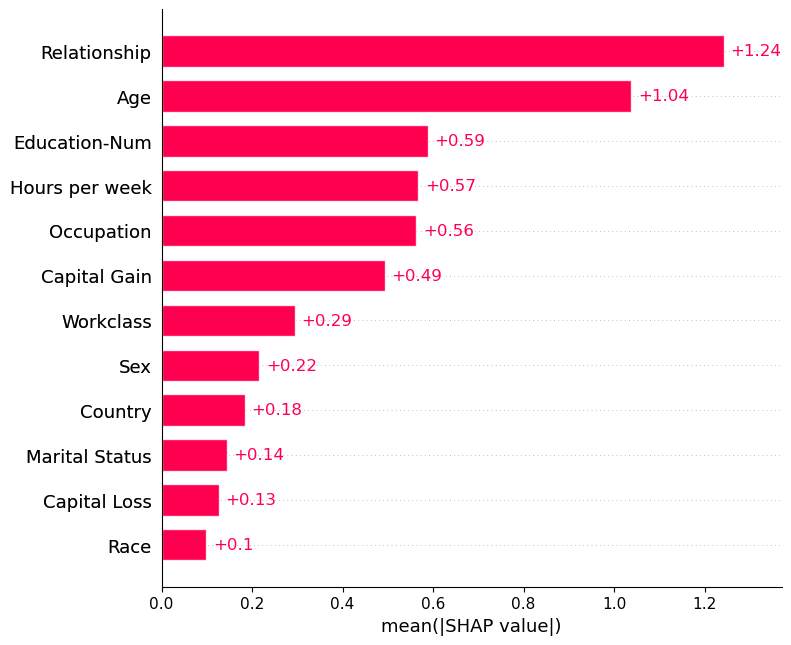

In [3]:
# train XGBoost model
X, y = shap.datasets.adult(n_points=2000)
model = xgboost.XGBClassifier().fit(X, y)

# compute SHAP values
explainer = shap.Explainer(model, X)
shap_values = explainer(X)
shap.plots.bar(shap_values,max_display=12)

In [4]:
features = []
values = []
for feature, value in zip(shap_values.feature_names, shap_values.values.mean(axis=0)):
    print(f"Feature: {feature}, Value: {value}")
    features.append(feature)
    values.append(value)

Feature: Age, Value: 0.0245500086632582
Feature: Workclass, Value: 0.02291231186986856
Feature: Education-Num, Value: -0.06642679202862066
Feature: Marital Status, Value: -0.01129090249980698
Feature: Occupation, Value: 0.011523914926096042
Feature: Relationship, Value: -0.0704102144996009
Feature: Race, Value: 0.0030698184892295117
Feature: Sex, Value: 0.01875506412015293
Feature: Capital Gain, Value: 0.1668447972195226
Feature: Capital Loss, Value: 0.03152140950224249
Feature: Hours per week, Value: 0.03927757797946175
Feature: Country, Value: 0.03094782717505497


In [ ]:
"""

Feature: Age, Value: 1.04
Feature: Workclass, Value: 0.29
Feature: Education-Num, Value: 0.59
Feature: Marital Status, Value: -0.14
Feature: Occupation, Value: 0.56
Feature: Relationship, Value: 1.24
Feature: Race, Value: 0.1
Feature: Sex, Value: 0.22
Feature: Capital Gain, Value: 0.49
Feature: Capital Loss, Value: 0.13
Feature: Hours per week, Value: 0.57
Feature: Country, Value: 0.18
"""

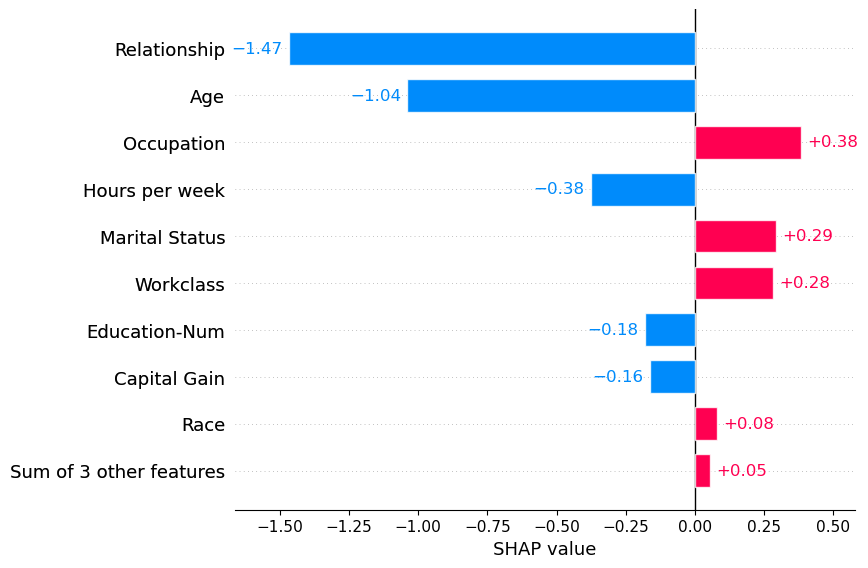

In [6]:
shap.plots.bar(shap_values[0])

In [15]:
shap_values[0].data

array([27.,  4., 10.,  0.,  1.,  1.,  4.,  0.,  0.,  0., 44., 39.])

In [12]:
for feature, value in zip(shap_values[0].feature_names, shap_values[0].values):
    print(f"Feature: {feature}, Value: {value}")
    features.append(feature)
    values.append(value)

Feature: Age, Value: -1.0396302726236173
Feature: Workclass, Value: 0.2834830520895775
Feature: Education-Num, Value: -0.1816734095069114
Feature: Marital Status, Value: 0.29311687163542954
Feature: Occupation, Value: 0.38351425481319895
Feature: Relationship, Value: -1.4683598917897325
Feature: Race, Value: 0.07990518419072032
Feature: Sex, Value: -0.015893503637053073
Feature: Capital Gain, Value: -0.16404540448682384
Feature: Capital Loss, Value: -0.008758421652019024
Feature: Hours per week, Value: -0.3751717181224376
Feature: Country, Value: 0.07733929582638666
